# Universidad de O'Higgins

## Escuela de Ingeniería
## COM4402: Introducción a Inteligencia Artificial

### **Tarea 2: Clasificación de Dígitos Manuscritos con Redes Neuronales**

### Estudiante: Sebastián Acevedo Ulloa

El objetivo de esta tarea es utilizar redes neuronales en un problema de clasificación de dígitos. Se utilizará el conjunto de datos Optical Recognition of Handwritten Digits Data Set. Este conjunto tiene 64 características, con 10 clases y 5620 muestras en total. La base de datos estará disponible en U-Campus.

Las redes a ser entrenadas tienen la siguiente estructura: capa de entrada de dimensionalidad 64 (correspondiente a los datos de entrada), capas ocultas (una o dos) y capa de salida con 10 neuronas y función de activación softmax. La función de loss (pérdida) es entropía cruzada. El optimizador que se
debe usar es Adam. La función softmax está implícita al usar la función de pérdida CrossEntropyLoss de PyTorch (**no se debe agregar softmax a la salida de la red**).

Se usará PyTorch para entrenar y validar la red neuronal que implementa el clasificador de dígitos. Se analizará los efectos de cambiar el tamaño de la red (número de capas ocultas y de neuronas en estas
capas) y la función de activación.

**Instrucciones de ejecucion**: Ejecutar código secuencialmente, primero importar librerias, cargar datasets de digitos, leer datasets de digitos, seleccionar modelo a utilizar (segun lo que se quiera ver, seleccionar uno de los modelos), crear datasets para pytorch, entrenar modelo, la siguiente parte del código puede ser ejecutada segun lo que se requiera ver.

**El mejor modelo para el punto 3 (el con mejor accuracy en la etapa de validación)** es: modelo con dos capas ocultas, 40 neuronas en cada una, funcion de activacion ReLu



In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


## Cargar datasets de digitos


In [ ]:
!wget raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_train.txt
!wget raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_test.txt

--2023-10-27 00:13:17--  http://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_train.txt [following]
--2023-10-27 00:13:17--  https://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_train.txt
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 640604 (626K) [text/plain]
Saving to: ‘1_digits_train.txt’

1_digits_train.txt  100%[===================>] 625.59K  --.-KB/s    in 0.01s   

2023-10-27 00:13:17 (63.5 MB/s) - ‘1_digits_train.txt’ saved [640604

## Leer dataset de dígitos

In [ ]:
column_names = ["feat" + str(i) for i in range(64)]
column_names.append("class")

In [ ]:
df_train_val = pd.read_csv('1_digits_train.txt', names = column_names)
df_train_val

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,0,0,9,11,0,0,0,0,0,7,...,0,0,0,8,12,12,15,10,0,2
4343,0,0,6,15,2,0,0,0,0,0,...,0,0,0,7,16,16,10,1,0,6
4344,0,0,15,16,16,14,0,0,0,0,...,0,0,0,14,11,0,0,0,0,7
4345,0,0,0,1,15,11,0,0,0,0,...,0,0,0,0,1,16,10,0,0,4


In [ ]:
df_test = pd.read_csv('1_digits_test.txt', names = column_names)
df_test

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,13,12,10,12,8,0,0,2,...,0,0,0,10,16,16,8,0,0,5
1,0,0,8,16,14,4,0,0,0,5,...,0,0,0,10,16,14,12,2,0,9
2,0,0,0,7,16,0,0,0,0,0,...,0,0,0,0,9,15,1,0,0,4
3,0,0,2,14,9,2,0,0,0,0,...,0,0,0,2,14,14,2,0,0,0
4,0,1,16,16,15,3,0,0,0,0,...,0,0,0,16,6,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
1268,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
1269,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
1270,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [ ]:
df_train, df_val = train_test_split(df_train_val, test_size = 0.3, random_state = 10)

In [ ]:
scaler = StandardScaler().fit(df_train.iloc[:,0:64])
df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
df_test.iloc[:,0:64] = scaler.transform(df_test.iloc[:,0:64])

<ipython-input-7-9f48500b620a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
<ipython-input-7-9f48500b620a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
<ipython-input-7-9f48500b620a>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns

In [ ]:
df_train

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
4026,0.0,-0.338570,0.797238,0.535297,-0.599203,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,-0.302452,0.078492,-0.427291,0.468026,1.548367,0.696964,-0.186744,9
1548,0.0,-0.338570,-0.269346,0.999221,0.985819,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.121990,0.248408,0.876852,1.378118,-0.527715,-0.186744,3
1709,0.0,-0.338570,-0.482663,0.535297,0.759387,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.723436,-0.427291,0.876852,1.548367,-0.037843,-0.186744,1
2195,0.0,2.026364,1.863823,-0.392551,-2.410657,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,1.890776,1.481867,-0.652523,-0.758451,0.356618,1.186836,-0.186744,2
1216,0.0,2.026364,0.797238,0.767259,0.985819,1.661897,0.191388,-0.13043,-0.045374,2.953365,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.672439,0.356618,-0.282779,-0.186744,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0.0,-0.338570,-1.122613,-2.248248,-0.599203,1.839863,0.493359,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-1.124400,-2.679617,0.468026,-0.664881,-0.527715,-0.186744,9
1180,0.0,0.843897,0.583922,-0.392551,0.532956,0.772065,-0.412556,-0.13043,-0.045374,3.278195,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.468026,0.867368,0.452028,-0.186744,3
3441,0.0,-0.338570,-0.269346,-0.160589,0.985819,0.950031,-0.110584,-0.13043,-0.045374,0.354728,...,-0.206188,0.0,-0.302452,0.078492,0.473640,-2.393755,-1.175631,-0.527715,-0.186744,9
1344,0.0,-0.338570,1.223872,0.999221,0.985819,0.238166,-0.412556,-0.13043,-0.045374,0.029899,...,0.911859,0.0,-0.302452,0.880421,0.924106,0.876852,1.548367,3.391260,6.008192,2


## Seleccionar modelo a entrenar

In [ ]:
# Modelo de 10 neuronas en la capa oculta, usando función de activación ReLU
model = nn.Sequential(
          nn.Linear(64, 10),
          nn.ReLU(),
          nn.Linear(10,10)
        )
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Modelo de 40 neuronas en la capa oculta, usando función de activación ReLU
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.ReLU(),
          nn.Linear(40,10)
        )
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Modelo de 10 neuronas en la capa oculta, usando función de activación Tanh
model = nn.Sequential(
          nn.Linear(64, 10),
          nn.Tanh(),
          nn.Linear(10,10)
        )
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Modelo de 40 neuronas en la capa oculta, usando función de activación Tanh
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.Tanh(),
          nn.Linear(40,10)
        )
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Modelo de 2 capas ocultas con 10 y 10 neuronas cada una y función de activación ReLU
model = nn.Sequential(
          nn.Linear(64, 10),
          nn.ReLU(),
          nn.Linear(10,10),
          nn.ReLU(),
          nn.Linear(10,10)
        )
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Modelo de 2 capas ocultas con 40 y 40 neuronas cada una y función de activación ReLU
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.ReLU(),
          nn.Linear(40,40),
          nn.ReLU(),
          nn.Linear(40,10)
        )
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## Crear datasets y dataloaders para pytorch (train)

In [ ]:
# Crear datasets
feats_train = df_train.to_numpy()[:,0:64].astype(np.float32)
labels_train = df_train.to_numpy()[:,64].astype(int)
dataset_train = [ {"features":feats_train[i,:], "labels":labels_train[i]} for i in range(feats_train.shape[0]) ]

feats_val = df_val.to_numpy()[:,0:64].astype(np.float32)
labels_val = df_val.to_numpy()[:,64].astype(int)
dataset_val = [ {"features":feats_val[i,:], "labels":labels_val[i]} for i in range(feats_val.shape[0]) ]

feats_test = df_test.to_numpy()[:,0:64].astype(np.float32)
labels_test = df_test.to_numpy()[:,64].astype(int)
dataset_test = [ {"features":feats_test[i,:], "labels":labels_test[i]} for i in range(feats_test.shape[0]) ]

In [ ]:
# Crear dataloaders
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=128, shuffle=True, num_workers=0)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=128, shuffle=True, num_workers=0)

## Entrenamiento

In [ ]:
start = time.time()

# Guardar resultados del loss y épocas que duró el entrenamiento
loss_train = []  # Lista para almacenar la loss train en el entrenamiento
loss_val = []  # Lista para almacenar loss val en el entrenamiento
epochs = []  # Lista para almacenar los epoch en el entrenamiento
accuracy_train = []  # Lista para almacenar la precisión en el entrenamiento
accuracy_val = []    # Lista para almacenar la precisión en la validación

# Parametros del early stopping
max_epochs_without_improvement = 150
best_val_loss = float('inf')
epochs_without_improvement = 0

# Parametros de la predicción
predictions_train = []
true_labels_train = []
predictions = []
true_labels = []

# loop over the dataset multiple times
for epoch in range(1001):

  # Guardar variables de cada batch
  loss_train_batches = []  # Lista para almacenar loss train batch en el entrenamiento
  loss_val_batches = []  # Lista para almacenar loss val por batch en el entrenamiento
  accuracy_train_batches = []  # Lista para almacenar precisión por batch en el entrenamiento
  accuracy_val_batches = []    # Lista para almacenar precisión por batch en la validación

  # Entrenamiento
  model.train()

  # Train on the current epoch
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual definiendo caracteristicas y etiquetas
    inputs = data["features"].to(device)
    labels = data["labels"].to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward() # backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

    # Guardar etiquetas predichas
    _, predicted = torch.max(outputs, 1)
    predictions_train.extend(predicted.cpu().numpy())
    true_labels_train.extend(labels.cpu().numpy())

    # Calculamos la precisión en el batch actual
    accuracy = accuracy_score(labels.cpu().numpy(), predicted.cpu().numpy())
    accuracy_train_batches.append(accuracy)

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Guardamos el accuracy  de la época actual
  accuracy_train.append(np.mean(accuracy_train_batches))  # Precisión promedio en el entrenamiento

  model.eval()
  predictions_test = []
  true_labels_test = []
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases
      outputs = model(inputs)              # Obtenemos predicciones

      # Guardar etiquetas predichas
      _, predicted = torch.max(outputs, 1)
      predictions.extend(predicted.cpu().numpy())
      true_labels.extend(labels.cpu().numpy())
      predictions_test.extend(predicted.cpu().numpy())
      true_labels_test.extend(labels.cpu().numpy())

      # Calculamos la precisión en el batch actual
      accuracy = accuracy_score(labels.cpu().numpy(), predicted.cpu().numpy())
      accuracy_val_batches.append(accuracy)

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos el accuracy de la época actual
  accuracy_val.append(np.mean(accuracy_val_batches))  # Precisión promedio en la validación

  # Guardamos la época
  epochs.append(epoch)

  current_val_loss = loss_val[epoch]
  if current_val_loss < best_val_loss:
      # Guardar el modelo actual si la pérdida de validación ha mejorado
      best_val_loss = current_val_loss
      torch.save(model.state_dict(), 'best_model.pth')
      epochs_without_improvement = 0
  else:
      # La pérdida de validación no ha mejorado
      epochs_without_improvement += 1

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f, accuracy: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch], accuracy_val[epoch])))

  # Comprobar si debemos detener el entrenamiento
  if epochs_without_improvement >= max_epochs_without_improvement:
      print("Deteniendo el entrenamiento debido a la falta de mejora en validación.")
      break
  test_accuracy = accuracy_score(true_labels_test, predictions_test)

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))

Epoch: 0, train loss: 2.2186, val loss: 2.1255, accuracy: 0.3160
Epoch: 1, train loss: 2.0365, val loss: 1.9433, accuracy: 0.4574
Epoch: 2, train loss: 1.8298, val loss: 1.7051, accuracy: 0.6010
Epoch: 3, train loss: 1.6032, val loss: 1.4656, accuracy: 0.6636
Epoch: 4, train loss: 1.3851, val loss: 1.2688, accuracy: 0.6942
Epoch: 5, train loss: 1.1982, val loss: 1.1213, accuracy: 0.7225
Epoch: 6, train loss: 1.0441, val loss: 0.9726, accuracy: 0.7509
Epoch: 7, train loss: 0.9158, val loss: 0.8725, accuracy: 0.7845
Epoch: 8, train loss: 0.8064, val loss: 0.7666, accuracy: 0.7998
Epoch: 9, train loss: 0.7147, val loss: 0.6893, accuracy: 0.8255
Epoch: 10, train loss: 0.6412, val loss: 0.6290, accuracy: 0.8455
Epoch: 11, train loss: 0.5798, val loss: 0.5660, accuracy: 0.8576
Epoch: 12, train loss: 0.5279, val loss: 0.5032, accuracy: 0.8792
Epoch: 13, train loss: 0.4859, val loss: 0.4850, accuracy: 0.8811
Epoch: 14, train loss: 0.4463, val loss: 0.4329, accuracy: 0.8998
Epoch: 15, train los

## Graficar

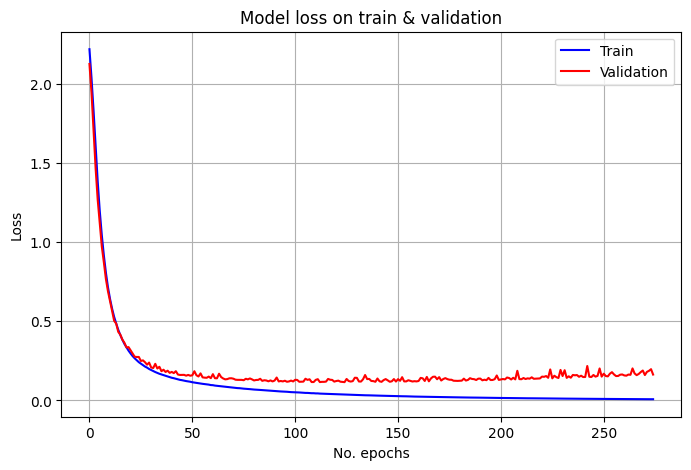

In [ ]:
import matplotlib.pyplot as plt

# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, 'b', label = 'Train')
plt.plot(epochs, loss_val, 'r', label = 'Validation')
plt.grid()
plt.legend()

## Calcular matriz de confusión usando conjunto de entrenamiento




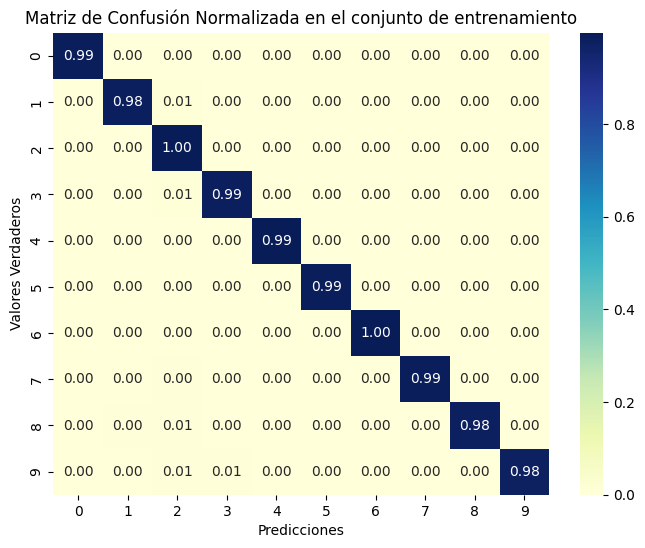

In [ ]:
import seaborn as sns

cm_train = confusion_matrix(true_labels_train, predictions_train)
normalized_cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
accuracy_train = accuracy_score(true_labels_train, predictions_train)

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cm_train, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Confusión Normalizada en el conjunto de entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

## Calcular matriz de confusión usando conjunto de validación




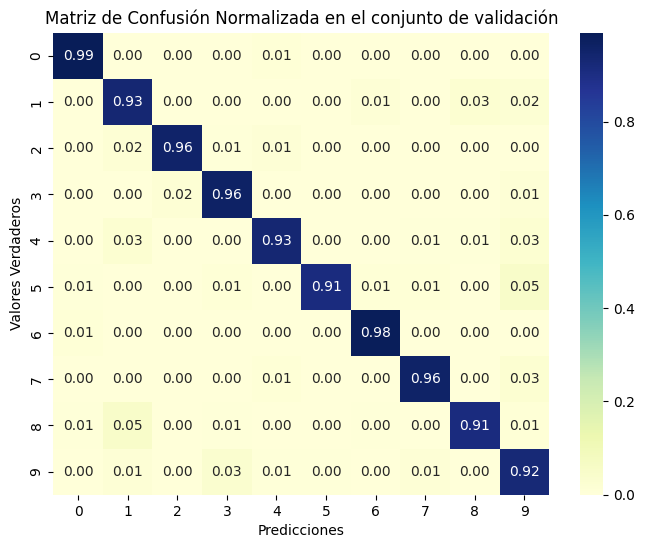

In [ ]:
import seaborn as sns

cm = confusion_matrix(true_labels, predictions)
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = accuracy_score(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cm, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Confusión Normalizada en el conjunto de validación")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

## Calcular matriz de confusión usando conjunto de pruebas




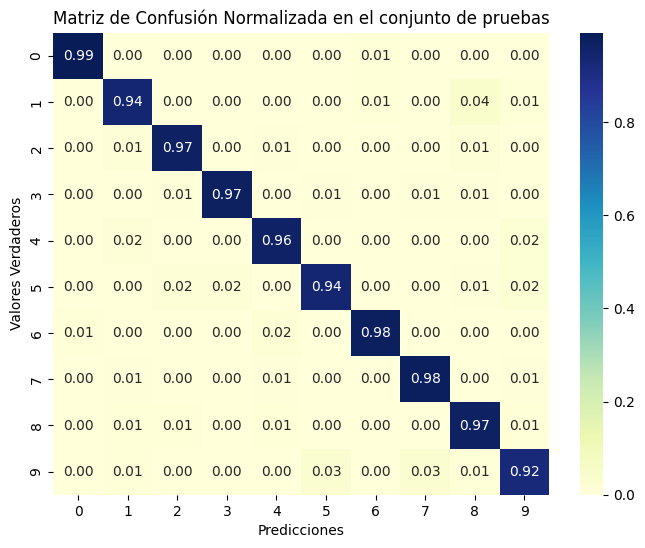

In [ ]:
import seaborn as sns

cm = confusion_matrix(true_labels_test, predictions_test)
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = accuracy_score(true_labels_test, predictions_test)

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cm, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Confusión Normalizada en el conjunto de pruebas")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()